<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#03b7b4;"> UNIVARIATE STATISTICS ANALYSIS

* Most of the univariate statistics are based on the linear model which is one of the main
model in machine learning.

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#03b7b4;"> Few concepts for reference

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 1. Normal distribution

The normal distribution, noted 𝒩 (𝜇, 𝜎) with parameters: 𝜇 mean (location) and 𝜎 > 0 std-dev.
Estimators: 𝑥¯ and 𝜎𝑥.

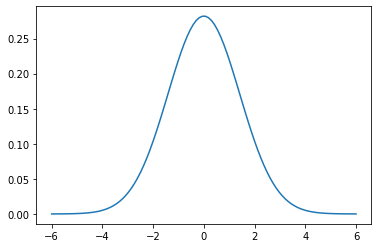

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
mu = 0 # mean
variance = 2 #variance
sigma = np.sqrt(variance) #standard deviation\n",
x = np.linspace(mu-3*variance,mu+3*variance, 100)
plt.plot(x, norm.pdf(x, mu, sigma))

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Observations:
    1. mean = 0
    2. variance = 2 (dispersion of the plot)
    3. sigma = standard deviation\n
    4. The orginal Normal distribution plot look like this way.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;">2. Binomial distribution

0.01760010010885238


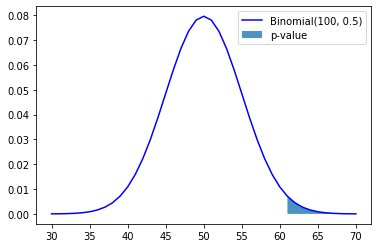

In [2]:
import scipy.stats
import matplotlib.pyplot as plt

succes = np.linspace(30, 70, 41)
plt.plot(succes, scipy.stats.binom.pmf(succes, 100, 0.5), 'b-', label="Binomial(100, 0.5)")
upper_succes_tvalues = succes[succes > 60]
plt.fill_between(upper_succes_tvalues, 0, scipy.stats.binom.pmf(upper_succes_tvalues, 100,0.5), alpha=.8, label="p-value")
plt.legend()
pval = 1 - scipy.stats.binom.cdf(60, 100, 0.5)
print(pval)


<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Observations:

    1. The Binomial distribution plot with P-value.
   

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> Univariate Analysis Plots

## Quantitative:

1. Kernel Density plot
2. Histogram
3. Box plot 


## Categorical: 

1. Bar chart
2. Pie chart


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#03b7b4;">  Case study 1 
    <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c40f27;"> (Ammonia concentration)

## Ammonia concentration

Description:	The ammonia concentration in a liquid stream, measured every 6 hours, from a waste water treatment unit.

Data source:	Simulated, but made to represent an actual problem.

Data shape:	    1440 rows and 1 columns

Added here on:	02 January 2011 20:03

Last updated:	11 November 2018 16:30

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 1.1 Loading the libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 1.2 import the  data?

In [4]:
df = pd.read_csv('ammonia.csv')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 1.3 check the size of your data?

In [5]:
df.shape

(1440, 1)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 1.4 How to view the statistical characteristics of the data?

In [6]:
df.describe()

,Ammonia
count,1440.000000
mean,36.094993
std,8.518928
min,9.990000
25%,30.225000
50%,36.180000
75%,42.370000
max,58.740000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 1.5 Check the Numerical Features?

In [7]:
num_features = df.select_dtypes(exclude="object").columns.values.tolist()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 1.6 Univariate Analysis for Quantitative

In [8]:
num_features

['Ammonia']

#### Kernel Density plot 

A density plot shows the distribution of a numerical variable. It takes only set of numeric values as input. It is really close to a histogram. Since it is a really common dataviz technique, 




<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> 1.6a) Plot the Kernel Density plot . And your Observations?

Mean: Ammonia    36.094993
dtype: float64
Var: Ammonia    72.521736
dtype: float64
Std: Ammonia    8.515969
dtype: float64


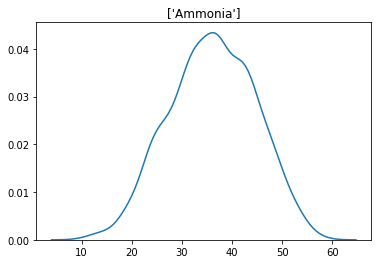

In [9]:
sns.distplot(df[num_features],hist=False)
print("Mean:",np.mean(df[num_features]))
print("Var:",np.var(df[num_features]))
print("Std:",np.std(df[num_features]))
plt.title(num_features)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Observations:
    

- Mean = 36
- Measure of spread is 72
- Standard deviation is 8

### Histograms

Histograms are similar to density plots; hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.


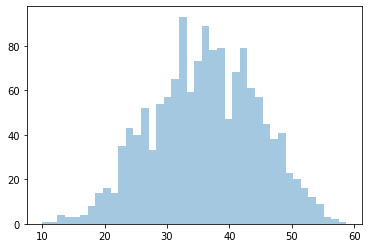

In [10]:
sns.distplot(df[num_features],kde=False,bins=40)

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> Method 1

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> 1.6b) Check the skweness in histogram?

In [11]:
df[num_features].skew()

Ammonia   -0.110601
dtype: float64

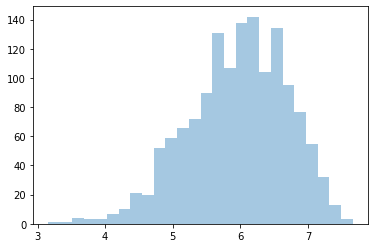

In [12]:
 # Get the square root of data points*
sqrt_transformed = df[num_features].apply(lambda x: x**0.5)

# Plot histogram for sqrt_transformed
sns.distplot(sqrt_transformed,kde=False)
plt.show()

In [13]:
sqrt_transformed.skew()

Ammonia   -0.433371
dtype: float64

- On data transformation left skewness increase, hence we drop the transformation.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> 1.6c) Appy the log_transformed to reduce skweness in data?

In [14]:
  # Get the log of the data
df['logAmmonia'] = np.log(df)

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> 1.6c) Check skweness in data reduced or not using Density plot.And your Observations?

In [15]:
df.columns

Index(['Ammonia', 'logAmmonia'], dtype='object')

Ammonia   -0.110601
dtype: float64
logAmmonia   -0.826942
dtype: float64


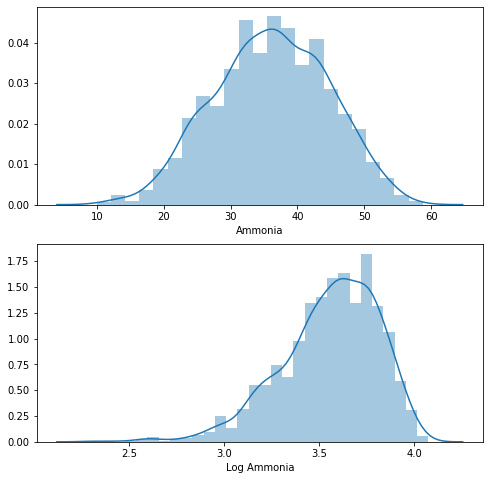

In [17]:
fig, ax = plt.subplots(2,1,figsize=(8,8))
ax[0].set_xlabel('Ammonia')

sns.distplot(df[['Ammonia']],ax=ax[0])
print(df[['Ammonia']].skew() )

ax[1].set_xlabel('Log Ammonia')
print(df[['logAmmonia']].skew() )
sns.distplot(df[['logAmmonia']],ax=ax[1])

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;">Observations:
   

In [18]:
# -0.110601
# -0.826942

- The Ammonia distribution plot(histogram + density) skew value was initially `-0.110601` and on transformation changed to `-0.826942`. Which means the graph became more left skewed.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> Method 2 

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> 1.6d) Another way to check the Skewness: Read the data again ammonia.csv

In [19]:
df1 = pd.read_csv('./ammonia.csv')
df1.head()

,Ammonia
0,35.00
1,40.66
2,41.05
3,32.29
4,35.59


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> 1.6e) Density plot for checking the skweness. And your Observations?

skew Ammonia   -0.110601
dtype: float64


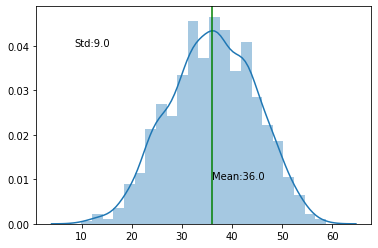

In [20]:
mean = df1.mean()
std = df1.std()
ax = sns.distplot(df1)
plt.axvline(mean[0],color='g')
plt.text(mean[0],0.01,'Mean:'+str(round(mean[0])))
plt.text(std[0],0.04,'Std:'+str(round(std[0])))
print('skew',df1.skew())
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Observations:
  

- The mean of the distribution is 36
- The skewness is -0.11 which is within the accpted range of -1 to 1.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> 1.6f) Apply log to Reduce Skewness Use Lambda functions.

In [21]:
df1.apply(lambda x : np.log(x)).skew()

Ammonia   -0.826942
dtype: float64

The graph is already normally distributed therefore not applying log transformation on it.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> 1.6g) Density plot to Check Skweness reduced or not. And your Observations?

Since the ditribution was almost normally distributed, applying log transformation will further shift the distribution making it more skewed.

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Observations:
   

#### BOXPLOT

* Boxplot is probably one of the most common type of graphic. It gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. 

* The end of the box shows the upper and lower quartiles. The extreme lines shows the highest and lowest value excluding outliers. Note that boxplot hides the number of values

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> 1.6h) Again read the dataset ammonia?

In [22]:
df1 = pd.read_csv('./ammonia.csv')
df1.head()

,Ammonia
0,35.00
1,40.66
2,41.05
3,32.29
4,35.59


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> 1.6 i) Check the outliers using Boxplot. And your Observations ?

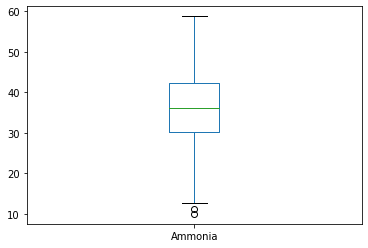

In [23]:
df1.plot.box()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Observations:
   

- Median of the distribution is around 35 and few outliers are observed.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> 1.6 j) Apply Log Transform. And your Observations ?

In [24]:
# Log Transform
df1['logAmmonia'] = df1.apply(lambda x: np.log(x))
df1['logAmmonia']

0       3.555348
1       3.705245
2       3.714791
3       3.474758
4       3.572065
          ...   
1435    3.496811
1436    3.643359
1437    3.872866
1438    3.765377
1439    3.546740
Name: logAmmonia, Length: 1440, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Observations:



Ammonia   -0.110601
dtype: float64
logAmmonia   -0.826942
dtype: float64


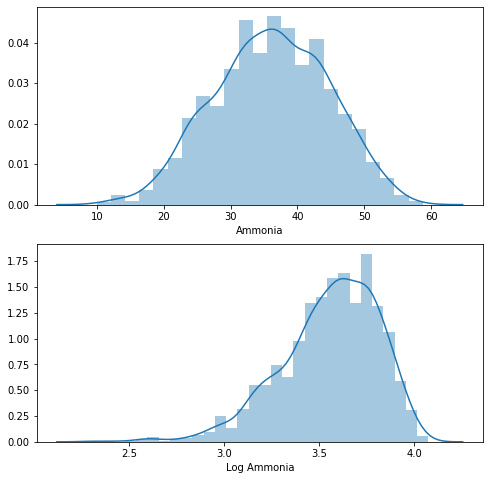

In [25]:
fig, ax = plt.subplots(2,1,figsize=(8,8))
ax[0].set_xlabel('Ammonia')

sns.distplot(df1[['Ammonia']],ax=ax[0])
print(df1[['Ammonia']].skew() )

ax[1].set_xlabel('Log Ammonia')
print(df1[['logAmmonia']].skew() )
sns.distplot(df1[['logAmmonia']],ax=ax[1])

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;"> 1.6 k) Check the outliers Removed or not using box plot. And your Observations ?

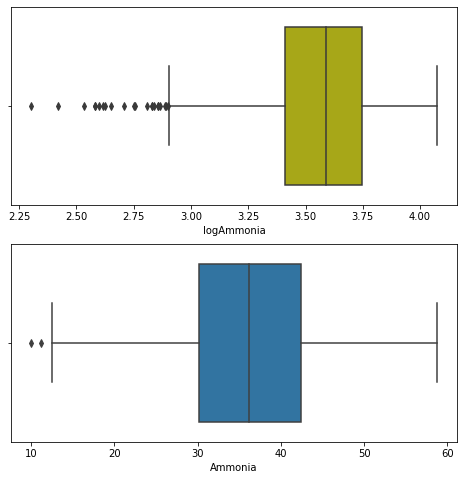

In [26]:
fig,ax = plt.subplots(2,1,figsize=(8,8))

sns.boxplot(x='logAmmonia',data=df1,ax=ax[0],color='y')
sns.boxplot(x='Ammonia',data=df1,ax=ax[1])

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Observations:
    


- As you can see, the number of outliers increased.
- From the distribution plot and box plot we can emphasize that applying log transformation has not helped the column `Ammonia`.

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#03b7b4;"> Case study 2 <span style="font-family: Arial; font-weight:bold;font-size:0.8em;color:#d14e0c;"> (Titanic Dateset)
    

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> Information about Dataset:

**Age** ==>> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

2. **Sibsp** ==>> The dataset defines family relations in this way...

    a. Sibling = brother, sister, stepbrother, stepsister

    b. Spouse = husband, wife (mistresses and fiancés were ignored)

3. **Parch** ==>> The dataset defines family relations in this way...

    a. Parent = mother, father

    b. Child = daughter, son, stepdaughter, stepson

    c. Some children travelled only with a nanny, therefore parch=0 for them.

4. **Pclass** ==>> A proxy for socio-economic status (SES)

    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower
    
5. **Embarked** ==>> nominal datatype 
6. **Name** ==>> nominal datatype . It could be used in feature engineering to derive the gender from title
7. **Sex** ==>>  nominal datatype 
8. **Ticket** ==>> that have no impact on the outcome variable. Thus, they will be excluded from analysis
9. **Cabin** ==>>  is a nominal datatype that can be used in feature engineering
11. **Fare** ==>>  Indicating the fare
12. **PassengerID ** ==>> have no impact on the outcome variable. Thus, it will be excluded from analysis
11. **Survival** is ==>> **[dependent variable], 0 or 1


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 2.1 Loading the libraries

In [27]:
from os import listdir

print(listdir())

['.ipynb_checkpoints', 'ammonia.csv', 'EDA-Questions-Day2.ipynb', 'shampoo.csv', 'Titanictrain.csv']


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 2.2 Import the dataset (train.csv')

In [28]:
train_df = pd.read_csv('./Titanictrain.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 2.3 Check the dataset.describe()

In [29]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 2.4 Check the Numerical Features,Categorical Features, Alphanumeric Features?

* Categorical: 

* Numerical Features: 

* Alphanumeric Features:

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 2.5 Univariate Analysis for Categorical:

    * Categorical: 

#### Bar chart

A barplot (or barchart) is one of the most common type of plot. It shows the relationship between a numerical variable and a categorical variable. For example, you can display the height of several individuals using bar chart. Barcharts are often confounded with


#### Pie Chart

Pie chart  is a circular graphic which is divided into slices to illustrate numerical proportion. The point of a pie chart is to show the relationship of parts out of a whole. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 2.6 Sex Analysis using bar chart and Pie chart. and your Overall Observations?

male      0.647587
female    0.352413
Name: Sex, dtype: float64


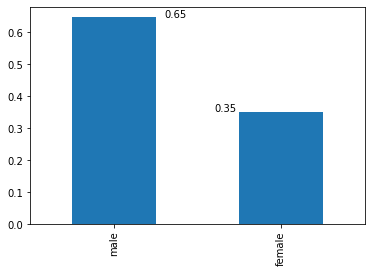

In [30]:
# plot a Bar plot
gender_val = train_df['Sex'].value_counts(normalize=True)
print(gender_val)
plt.text(0.3,gender_val['male'],round(gender_val['male'],2))
plt.text(0.6,gender_val['female'],round(gender_val['female'],2))
gender_val.plot.bar()
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Observations:


- 65% of males where there in the titanic

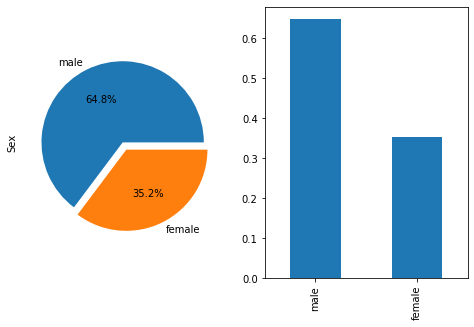

In [31]:
# plot a pie and bar plot using subplots(1,2,figsize=(8,5))
fig, ax = plt.subplots(1,2,figsize=(8,5))
gender_val.plot.pie(ax=ax[0],explode=[0,0.1],autopct="%.1f%%")
gender_val.plot.bar(ax=ax[1])
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Overall Observations:
   

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 2.7  Embarked(C = Cherbourg, Q = Queenstown, S = Southampton) Analysis using bar chart and Pie chart. and your Overall Observations?

In [32]:
# plot a Bar plot
embark = train_df['Embarked']
emb_val = embark.value_counts(normalize=True)
emb_val

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

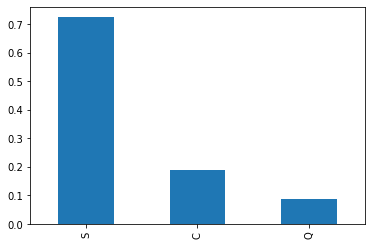

In [33]:
emb_val.plot.bar()
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Observations:
   

Most of the datatypes were of `Southampton`.

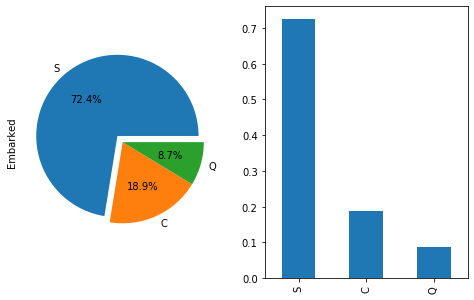

In [34]:
# plot a pie and bar plot using subplots(1,2,figsize=(8,5))
fig, ax = plt.subplots(1,2,figsize=(8,5))
emb_val.plot.pie(ax=ax[0],explode=[0.1,0,0],autopct="%.1f%%")
emb_val.plot.bar(ax=ax[1])
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Overall Observations:
    

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> 2.8 c) Pclass (Ticket class) Analysis using bar chart and Pie chart. and your Overall Observations?

In [35]:
# plot a Bar plot
pclass = train_df['Pclass']
pclass_val = pclass.value_counts()

In [36]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

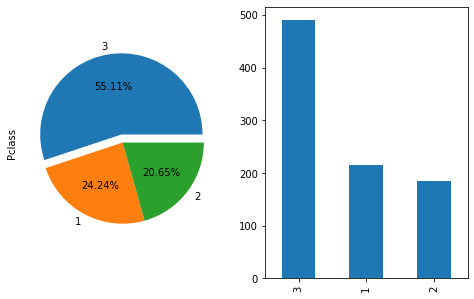

In [37]:
# plot a pie and bar plot using subplots(1,2,figsize=(8,5))
fig,ax = plt.subplots(1,2,figsize=(8,5))

pclass_val.plot.pie(ax=ax[0],autopct="%.2f%%",explode=[0.1,0,0])
pclass_val.plot.bar(ax=ax[1])
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;"> Overall Observations:
    

- Most of the passengers in the ship belonged to class 3.

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#03b7b4;">Case Study 3 <span style="font-family: Arial; font-weight:bold;font-size:0.8em;color:#d14e0c;">(Anti-diabetic drug sales in Australia
    )

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03b7b4;"> Seasonality and looking at trended data:


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#03b7b4;">3. 1 Create a Seasonality and looking at trended data. And write your Observations?
    
Read the raw data :https://raw.githubusercontent.com/selva86/datasets/master/a10.csv

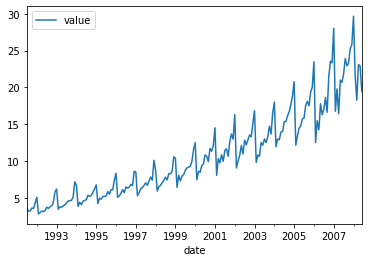

In [38]:

# Time series data source: 

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
df.plot()

In [39]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#03b7b4;">Observations:


- The data follows a recurring pattern.
- Series is seasonal in nature with continuous increment

<span style="font-family: Arial; font-weight:bold;font-size:3em;color:##8cff00;"> THE END